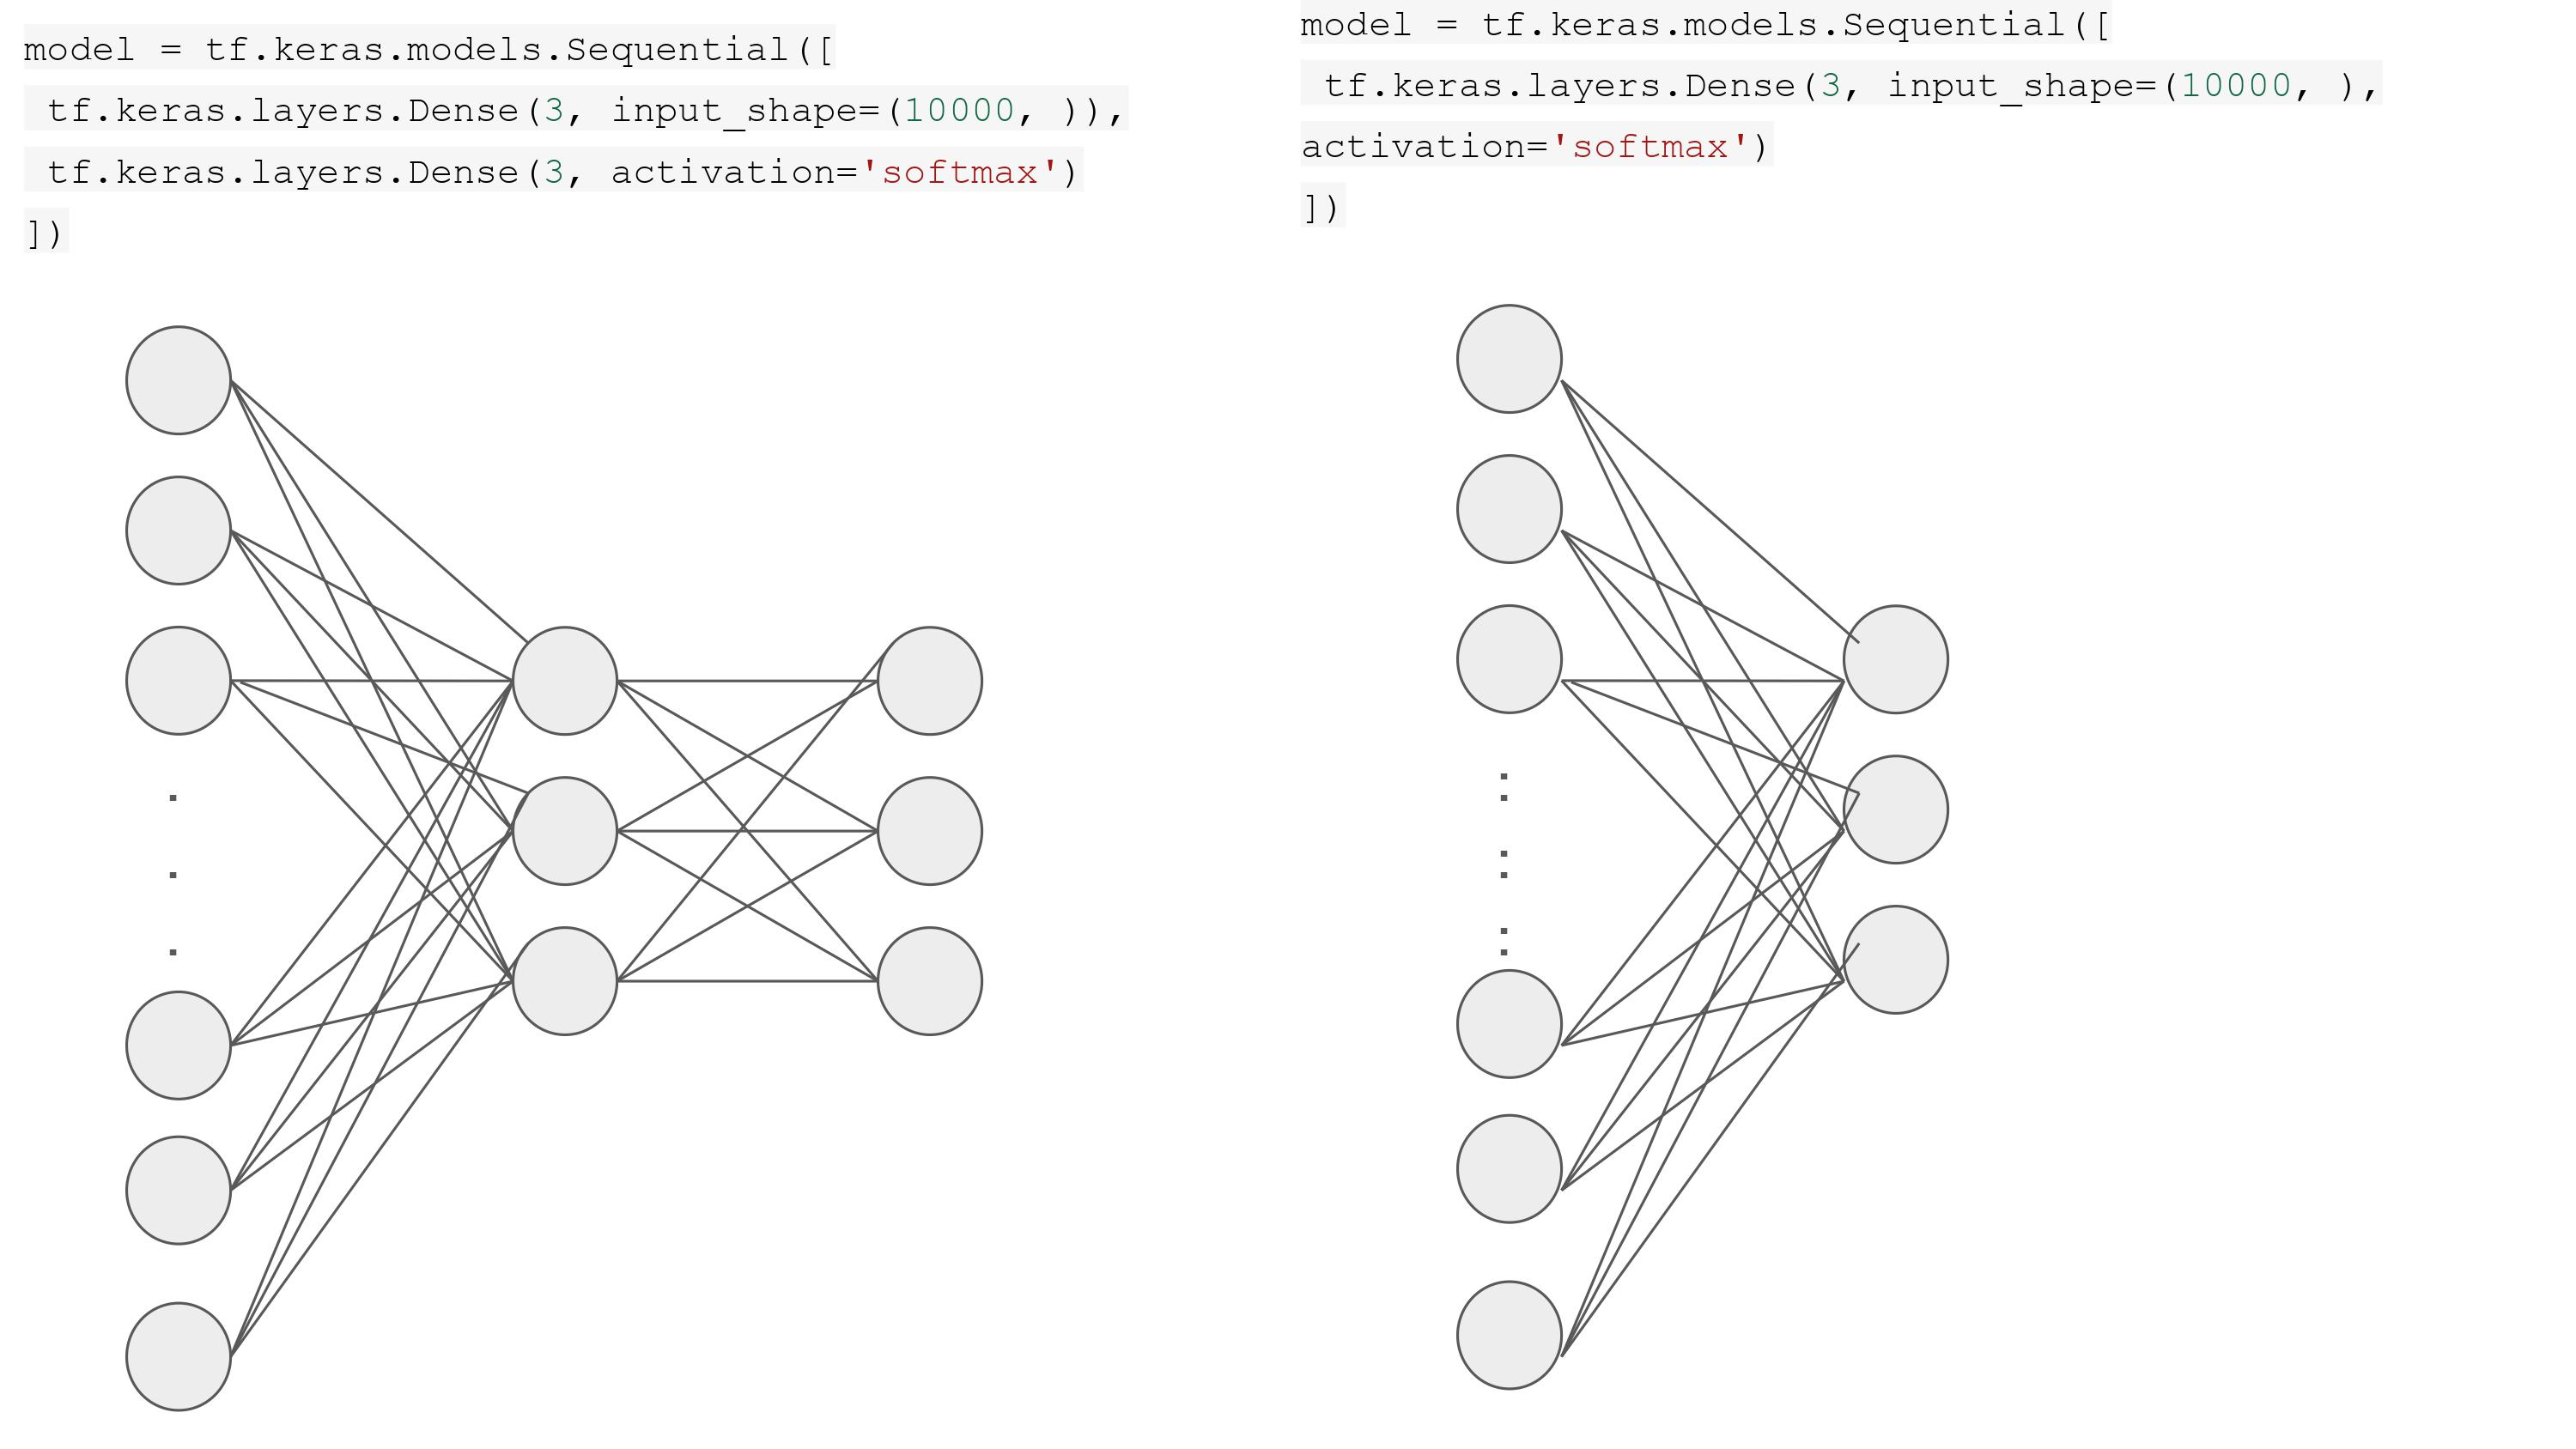

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [27]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor

In [29]:
mat = scipy.io.loadmat('case4_quantum.mat')
# mat
ns = mat['all_ns']
g2 = mat['g2']
n = mat['pop_O2_4saving']
Delta = mat['Delta_a_vector']

In [39]:
g2[0]

array([0.14025557])

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_2004\3571716774.py:2: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta_{\sigma}$",fontsize=20)


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

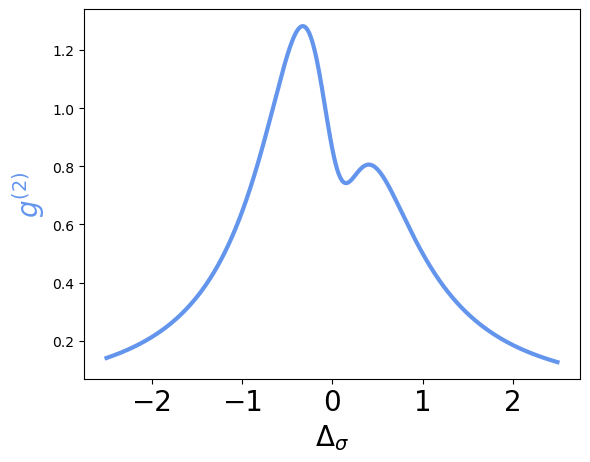

In [61]:
plt.plot(Delta, g2, color='cornflowerblue',linewidth=3)
plt.xlabel("$\Delta_{\sigma}$",fontsize=20)
plt.ylabel('$g^{(2)}$',fontsize=20, color='cornflowerblue')
plt.xticks(fontsize=20)
# plt.yticks([0.0,0.4,0.8,1.2,1.6],fontsize=20)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_2004\94581923.py:2: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta_{\sigma}$",fontsize=20)
C:\Users\kodo0\AppData\Local\Temp\ipykernel_2004\94581923.py:3: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$<a^{\dagger}a>$',fontsize=20, color='tomato')


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

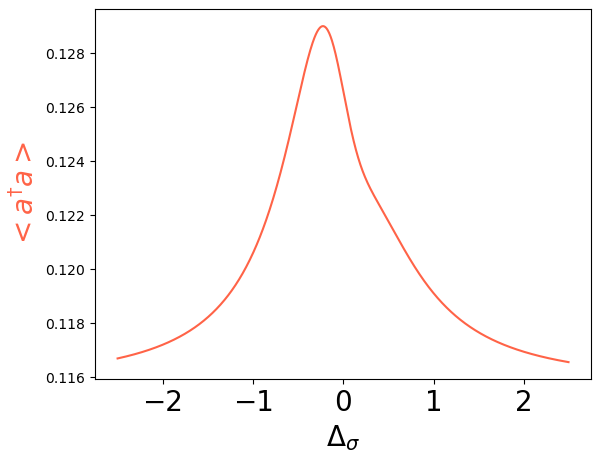

In [63]:
plt.plot(Delta, abs(n[0]), color='tomato')
plt.xlabel("$\Delta_{\sigma}$",fontsize=20)
plt.ylabel('$<a^{\dagger}a>$',fontsize=20, color='tomato')
plt.xticks(fontsize=20)
# plt.yticks([1.0,2,3,4,5],fontsize=20)

In [65]:
# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('Delta')
# ax1.set_ylabel('$g^{(2)}$', color=color)
# ax1.plot(Delta, abs(g2), color=color)
# # ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('$<a^{\dagger}a>$', color=color)  # we already handled the x-label with ax1
# ax2.plot(Delta,abs(den[0]), color=color)
# # ax2.plot(Delta,abs(den[0]))
# # ax2.tick_params(axis='y', labelcolor=color)

In [69]:
g2_re = []
n_s = []
for i in range(np.shape(g2)[0]):
# for i in range(np.shape(n1)[1]):
    # input = np.reshape(ns[0],len(ns[0]))
    # input = input/sum(input)
    # n_s.append(abs(ns[0][i]))
    g2_re.append({abs(g2[i][0]):Delta[i][0]})
    # g2_re.append(abs(g2[0][i]))

In [83]:
g2_re

[{0.1402555720350277: -2.5},
 {0.14078635504030002: -2.495},
 {0.14132006507073777: -2.49},
 {0.1418567229618321: -2.485},
 {0.1423963497274936: -2.48},
 {0.14293896656179933: -2.475},
 {0.1434845948407577: -2.47},
 {0.1440332561240918: -2.465},
 {0.14458497215704355: -2.46},
 {0.14513976487219546: -2.455},
 {0.1456976563913114: -2.45},
 {0.14625866902720036: -2.445},
 {0.1468228252855952: -2.44},
 {0.14739014786705598: -2.435},
 {0.14796065966889085: -2.43},
 {0.14853438378709874: -2.425},
 {0.1491113435183323: -2.42},
 {0.14969156236188236: -2.415},
 {0.15027506402168278: -2.41},
 {0.1508618724083376: -2.405},
 {0.15145201164116964: -2.4},
 {0.15204550605029057: -2.395},
 {0.15264238017869408: -2.39},
 {0.15324265878437032: -2.385},
 {0.15384636684244357: -2.38},
 {0.15445352954733338: -2.375},
 {0.1550641723149374: -2.37},
 {0.15567832078483868: -2.365},
 {0.15629600082253664: -2.36},
 {0.1569172385217012: -2.355},
 {0.15754206020645117: -2.35},
 {0.1581704924336579: -2.345},
 {0.15

In [71]:
# n_new = []
# for i in range(np.shape(g2)[1]):
#     n_new.append(np.concatenate((n_s[i], n_s[i]**2, n_s[i]**3)))


In [73]:
# X = np.reshape(n_s,(1000,1))
# X = n_new
X = ns
Y = np.reshape(g2_re,(1000,1))
# X, Y = shuffle(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
n = np.reshape(abs(n),[1000,])
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(n, g2_re, test_size=0.1)
X_train_c = np.reshape(X_train_c,[len(X_train_c),1])
X_test_c = np.reshape(X_test_c,[len(X_test_c),1])

In [91]:
Y_train_g2 = []
Y_train_r = []

Y_test_g2 = []
Y_test_r = []

for ele in Y_train:
  key = list(ele[0].keys())
  value = list(ele[0].values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_test:
  key = list(ele[0].keys())
  value = list(ele[0].values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

Y_train_g2_c = []
Y_train_r_c = []

Y_test_g2_c = []
Y_test_r_c = []

for ele in Y_train_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2_c.append(key)
  Y_train_r_c.append(value[0])
Y_train_g2_c = np.reshape(Y_train_g2_c,(len(Y_train_g2_c),1))

for ele in Y_test_c:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2_c.append(key[0])
  Y_test_r_c.append(value[0])
Y_test_g2_c = np.reshape(Y_test_g2_c,(len(Y_test_g2_c),1))

In [145]:
np.shape(X_train_c)

(900, 1)

In [149]:
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train_g2)
s1=regressor.score(X_train, Y_train_g2)
s2=regressor.score(X_test, Y_test_g2)
print([s1,s2])

Y_predict_RFR = regressor.predict(X_test)


regressor_classic = RandomForestRegressor(n_estimators=100)
regressor_classic.fit(X_train_c, Y_train_g2_c)
Y_predict_RFR_classic = regressor_classic.predict(X_test_c)
s1_c=regressor_classic.score(X_train_c, Y_train_g2_c)
s2_c=regressor_classic.score(X_test_c, Y_test_g2_c)
print([s1_c,s2_c])

C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.9998532714228828, 0.9969096363025195]


C:\Users\kodo0\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[0.9880015125183378, 0.8729708768754557]


0.00011501969082671429


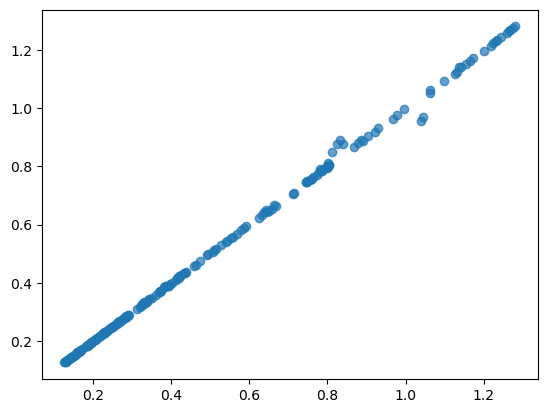

In [52]:
error = mean_squared_error(Y_test_g2,Y_predict_RFR)
print(error)
plt.scatter(Y_test_g2, Y_predict_RFR, alpha=0.7, label="Predicted vs True")

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_2004\3265037521.py:4: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta_{\sigma}$')


Text(0, 0.5, 'g2')

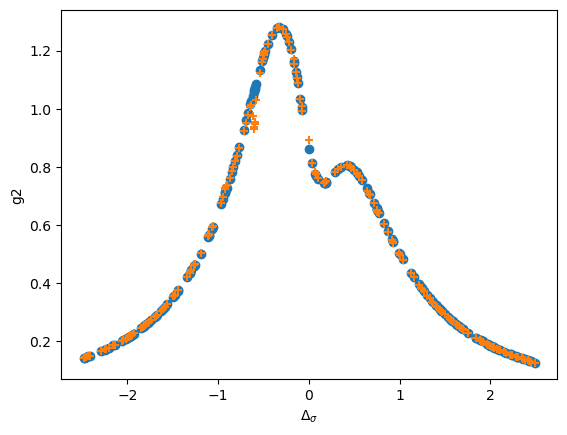

In [99]:
# plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_predict_RFR,marker="+")
plt.xlabel('$\Delta_{\sigma}$')
plt.ylabel('g2')
# plt.ylim([0,5])
# plt.title('reservoir+ESN')

In [115]:
mean_squared_error(Y_test_g2,Y_predict_RFR)

0.00036441906882621485

In [119]:
mean_squared_error(Y_test_g2_c,Y_predict_RFR_classic)

0.009161016554212434

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kodo0\AppData\Local\Temp\ipykernel_2004\2477924532.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta_{\sigma}$',fontsize=20)


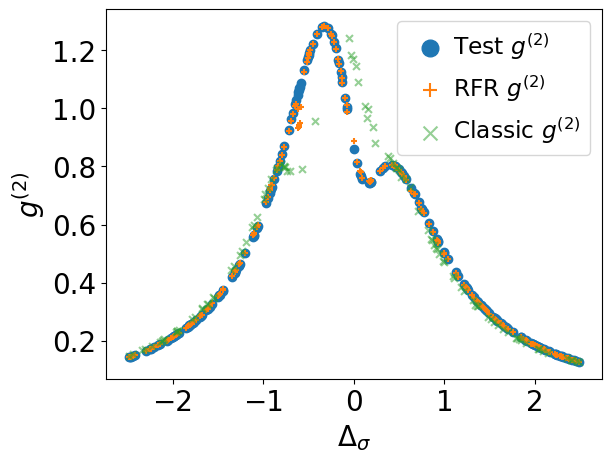

In [169]:
# plt.scatter(Y_test_r, Y_test_g2)
plt.scatter(Y_test_r, Y_test_g2,label = 'Test $g^{(2)}$')
plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'RFR $g^{(2)}$')
plt.scatter(Y_test_r_c, Y_predict_RFR_classic,marker="x",s=25,label = 'Classic $g^{(2)}$', alpha=0.5)
plt.xlabel('$\Delta_{\sigma}$',fontsize=20)
plt.ylabel('$g^{(2)}$',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.001, loc=1)
# plt.yticks([0.0,0.4,0.8,1.2,1.6],fontsize=20)
# plt.legend(fontsize=16.8,markerscale=2,handletextpad=0.001, bbox_to_anchor=(0.7,0.3))
# plt.text(0.4, 0.31, 'Train score = 0.999',fontsize=20)
# plt.text(0.4, 0.16, 'Test score = 0.999',fontsize=20)
# plt.text(0.4, 0.01, 'MSE = $2.27\\times10^{-6}$',fontsize=20)

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train_g2)

# 테스트 결과 예측
Y_predict_linear_regression = regressor.predict(X_test)
# 출처: https://giveme-happyending.tistory.com/185 [소연의_개발일지:티스토리]

0.00018080417206694726


Text(0, 0.5, 's_predict')

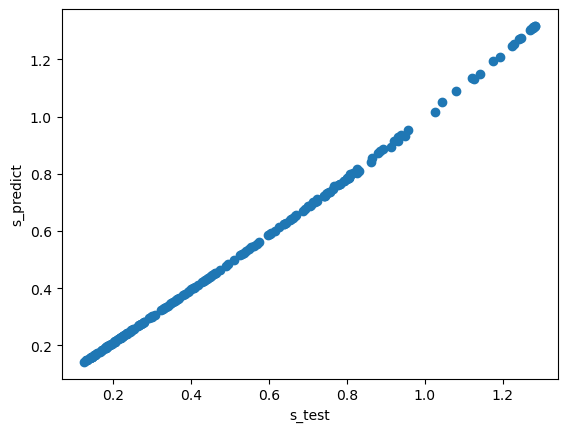

In [74]:
error = mean_squared_error(Y_test_g2,Y_predict)
print(error)
plt.scatter(Y_test_g2[:,0], Y_predict[:,0])
# plt.ylim([0, 0.7])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')


Text(0, 0.5, 'g2')

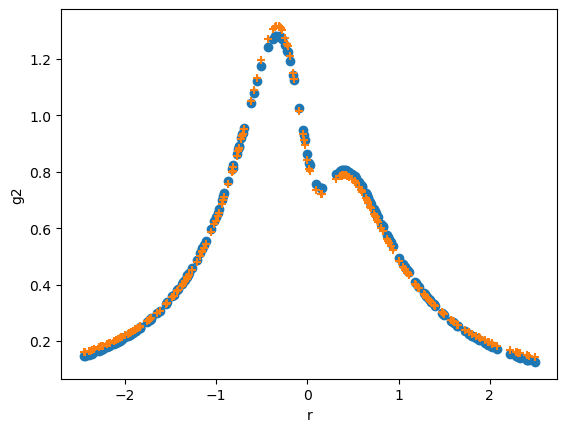

In [76]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict[:,0],marker="+")
plt.xlabel('Delta')
plt.ylabel('g2')
# plt.title('3 nodes')

In [ ]:
Y_test_r_6 = Y_test_r
Y_predict_6 = Y_predict[:,0]
Y_test_g2_6 = Y_test_g2

In [ ]:
Y_test_r_16 = Y_test_r
Y_predict_16 = Y_predict[:,0]
Y_test_g2_16 = Y_test_g2

In [ ]:
Y_test_r_8 = Y_test_r
Y_predict_8 = Y_predict[:,0]
Y_test_g2_8 = Y_test_g2

In [ ]:
Y_test_r_4 = Y_test_r
Y_predict_4 = Y_predict[:,0]
Y_test_g2_4 = Y_test_g2

In [ ]:
Y_predict_6

Text(0, 0.5, 's_predict')

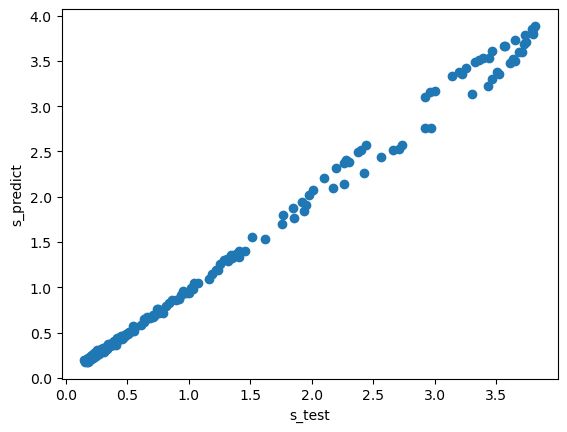

In [26]:
# plt.subplot(2,1,1)
plt.scatter(Y_test_g2[:,0], Y_predict_linear_regression[:,0])
# plt.ylim([0.7, 0.9])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')
# plt.subplot(2,1,2)


Text(0.5, 1.0, '3 nodes')

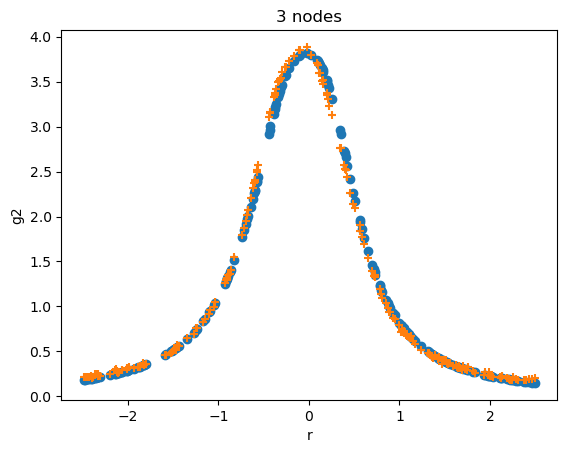

In [28]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict_linear_regression[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('3 nodes')

In [ ]:
Y_test